In [1]:
import random

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform as sf
import random as rd



In [2]:
#Loading dataset erasing nan columns 

df = pd.read_csv('Unsupervised Learning 23-24 - Project Dataset.csv', delimiter= ';', header = 0,
                 usecols= lambda col: col not in ['Row', 'Unnamed: 22','Unnamed: 23'], decimal= ',')
df
[N, M] = df.shape

Dim_20  Dim_18    0.787510
Dim_18  Dim_20    0.787510
        Dim_17    0.481127
Dim_17  Dim_18    0.481127
Dim_19  Dim_18    0.393994
Dim_18  Dim_19    0.393994
Dim_20  Dim_17    0.349693
Dim_17  Dim_20    0.349693
Dim_19  Dim_17    0.289140
Dim_17  Dim_19    0.289140
dtype: float64


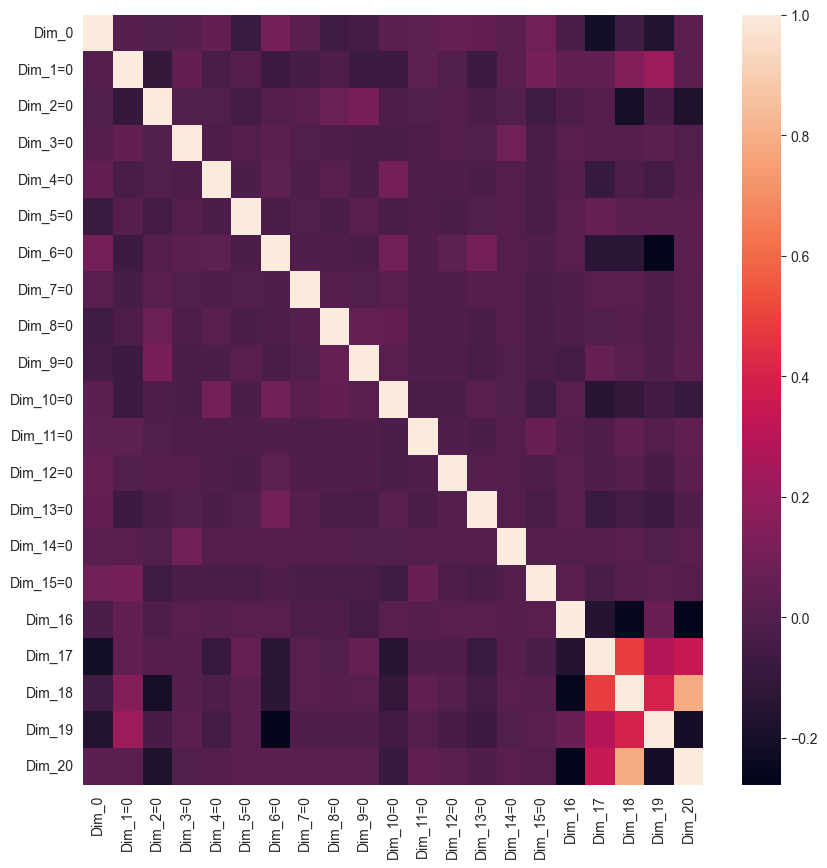

In [3]:
#computing correlation in the dataset, plotting only half matrix

corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot = False)
#printing the highest correlation values
corr = corr.abs()
corr = corr.unstack()
corr = corr.sort_values(ascending = False)
print(corr[corr < 1].head(10))
# save the image in a file
plt.savefig('correlation.png')



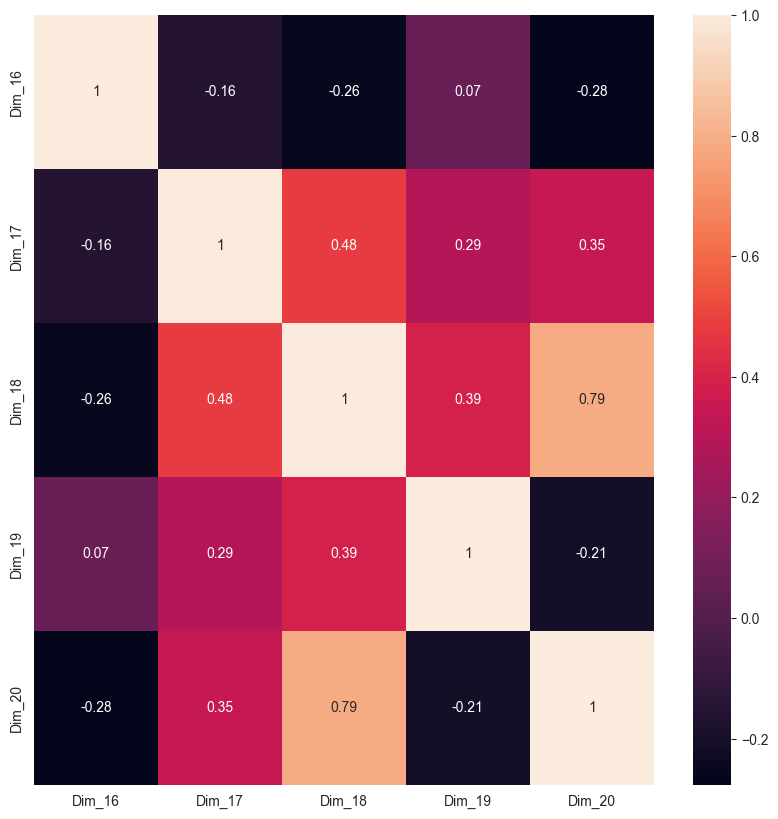

In [4]:
#correlation of only the last five variables
corr2 = df.iloc[:,range(16,21)].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr2, annot = True)
plt.savefig('correlation2.png')

0       0.750000
1       0.239583
2       0.479167
3       0.656250
4       0.229167
          ...   
7195    0.604167
7196    0.520833
7197    0.520833
7198    0.354167
7199    0.750000
Name: Dim_0, Length: 7200, dtype: float64


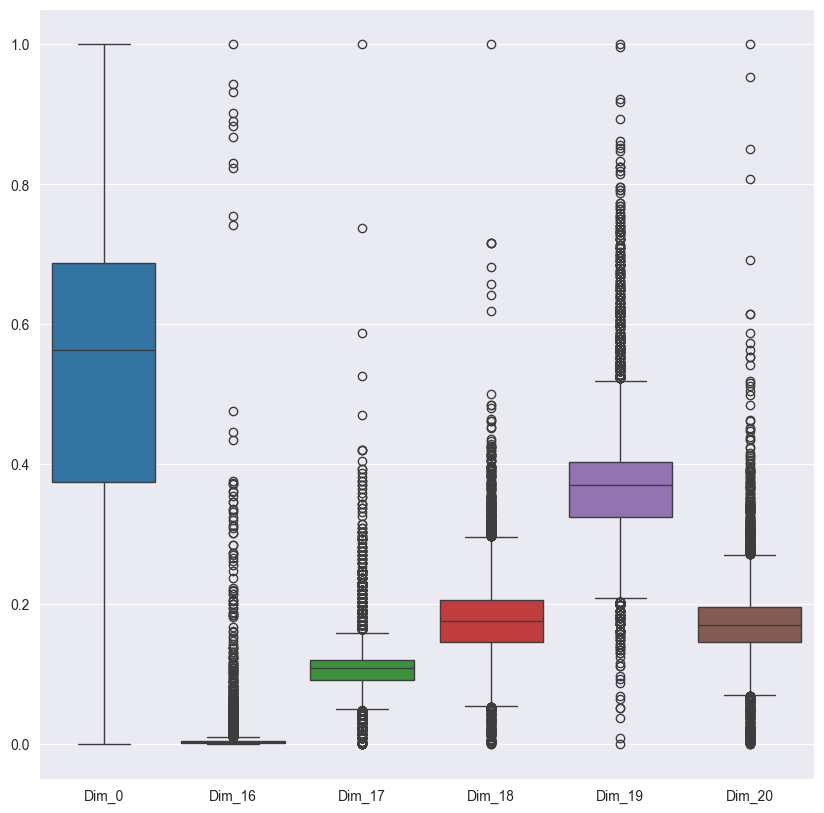

In [5]:
#Boxplot of the dataset (only the numerical variables)
print(df.iloc[:,0])
plt.figure(figsize=(10,10))
sns.boxplot(data = df.iloc[:,[0, 16 , 17, 18, 19, 20]])
plt.savefig('boxplot.png')


             Dim_0      Dim_1=0      Dim_2=0      Dim_3=0      Dim_4=0  \
count  7200.000000  7200.000000  7200.000000  7200.000000  7200.000000   
mean      0.531790     0.695694     0.869444     0.984583     0.987222   
std       0.197156     0.460145     0.336937     0.123212     0.112322   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.375000     0.000000     1.000000     1.000000     1.000000   
50%       0.562500     1.000000     1.000000     1.000000     1.000000   
75%       0.687500     1.000000     1.000000     1.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

           Dim_5=0      Dim_6=0      Dim_7=0  
count  7200.000000  7200.000000  7200.000000  
mean      0.961667     0.989167     0.985972  
std       0.192013     0.103525     0.117613  
min       0.000000     0.000000     0.000000  
25%       1.000000     1.000000     1.000000  
50%       1.000000     1.000000     1.000000  
75% 

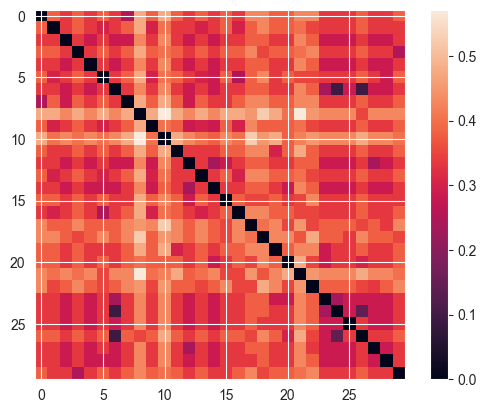

In [6]:
#Trying different metrics and visualizing the proximity matrices
print(df.describe().iloc[:, range(8)])
idx = rd.sample(range(7199),30 )
#print(idx)
METRIC = 'jaccard'
PM = pdist(df, metric = METRIC)
PM = sf(PM)

#Sampling only few samples to have a more understandable plot
PM2 = pdist(df.iloc[idx,:], metric = METRIC)
PM2 = sf(PM2)
plt.imshow(PM2)
plt.colorbar()
#print(PM)

#Trying Multidimensional scaling to visualize the dataset 

from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS
embedding = MDS(n_components=2, normalized_stress='auto', dissimilarity='precomputed')
pairdist = pairwise_distances(PM, metric='precomputed')
df_transformed = embedding.fit_transform(pairdist)
plt.scatter(df_transformed[:,0], df_transformed[:,1])

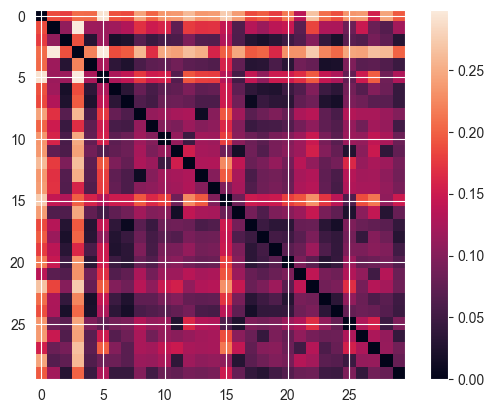

In [7]:
#MDS with gower distance
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS
import gower
PM3 = gower.gower_matrix(df)
plt.imshow(PM3)

idx = rd.sample(range(7199),30 ) #sampling only few samples to have a more understandable plot
PM4 = gower.gower_matrix(df.iloc[idx,:])
plt.imshow(PM4)
plt.colorbar()
plt.savefig('gower.png')

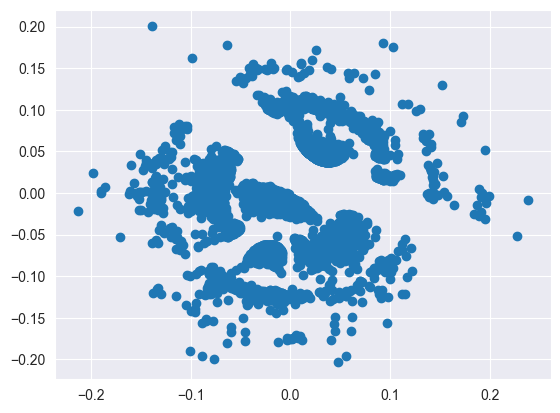

In [8]:

embedding = MDS(n_components=2, normalized_stress='auto', dissimilarity='precomputed')
pairdist2 = pairwise_distances(PM3, metric='precomputed')
df_transformed2 = embedding.fit_transform(pairdist2)
plt.scatter(df_transformed2[:,0], df_transformed2[:,1])

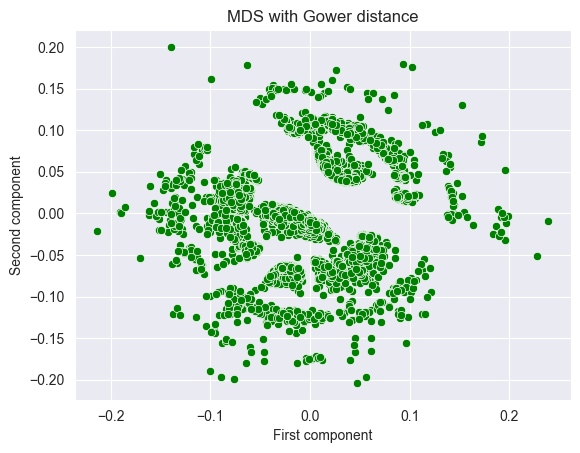

In [9]:
#Plot of mds
sns.scatterplot(x = df_transformed2[:,0], y = df_transformed2[:,1], color='green')
#title
plt.title("MDS with Gower distance")
plt.xlabel("First component")
plt.ylabel("Second component")
#save the image
plt.savefig('MDS.png')

# MDS in 3D
embedding_3d = MDS(n_components=3, normalized_stress='auto', dissimilarity='precomputed')
pairdist3 = pairwise_distances(PM3, metric='precomputed')
df_transformed3 = embedding_3d.fit_transform(pairdist3)

#plotting the 3D MDS
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_transformed3[:,0], df_transformed3[:,1], df_transformed3[:,2], marker='.', s=10, c='green')
plt.title("MDS with Gower distance")
plt.xlabel("First component")
plt.ylabel("Second component")
#add third component label
ax.set_zlabel('Third component')
plt.savefig('MDS3D.png')
plt.show()


In [10]:
from sklearn.manifold import TSNE
def TSNEPlot(dataset, labels):
    dist_matrix = gower.gower_matrix(dataset)
    tsne = TSNE(n_components=2, verbose=0, perplexity=20, n_iter=300, metric="precomputed", init='random')
    tsne_results = tsne.fit_transform(dist_matrix)

    # get the uniques labels
    # unique_labels = list(set(labels))
    # colors = []m,
    # for label in labels:
    #     colors.append(PAL[unique_labels.index(label)])
    # hue=labels, palette=PAL
    plt.figure(figsize=(10, 10))
    sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], color= 'green')
    plt.title("TSNE")
    plt.xlabel("First component")
    plt.ylabel("Second component")
    plt.savefig('TSNE.png')
    plt.show()

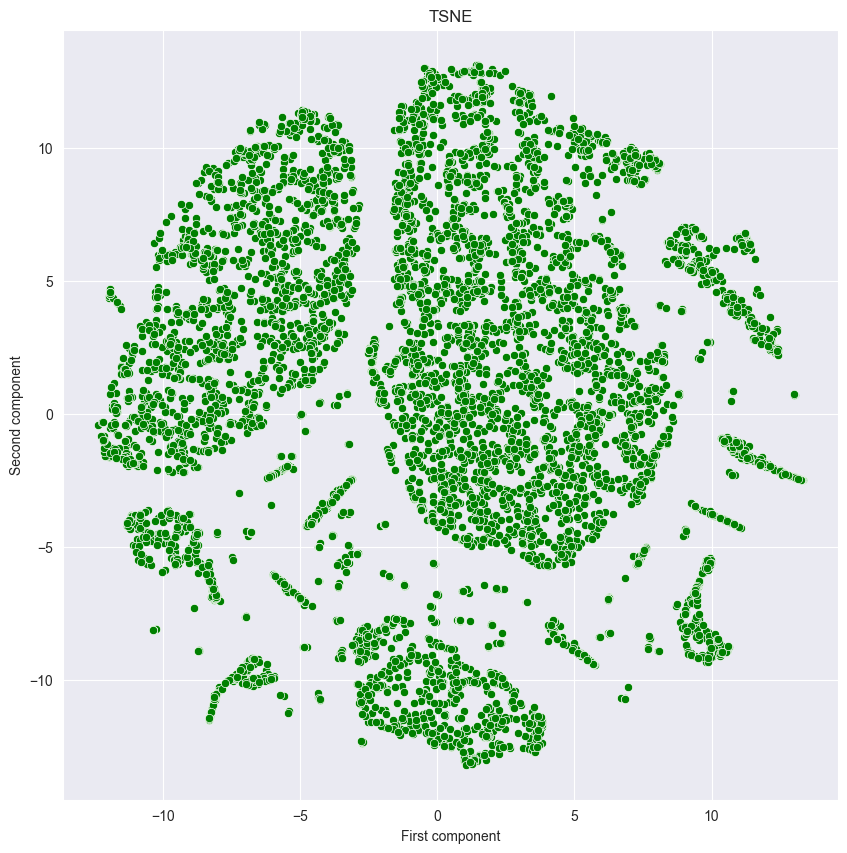

In [11]:
#import functions

N = df.shape[0]
labels = np.ones(N)
#functions.TSNEPlot(df,labels)
TSNEPlot(df,labels)

In [17]:
#Let's start with anomaly detection
#Isolation forest
from sklearn.ensemble import IsolationForest
#set seed
np.random.seed(42)
#Find out how auto in contamination works in the paper from the documentation
isoF =IsolationForest(contamination= 0.04)
isoF.fit(df)
#saving scores for later 
isof_scores = isoF.decision_function(df)
#print(scores)
#sorted_idx = np.argsort(scores)
#print(sorted_idx)
#sorted_scores = scores[sorted_idx]
#print(sorted_scores)
#anomalies = df.iloc[sorted_idx[1:10],:]
#print(anomalies)

classification = isoF.predict(df)
tot_outliers = sum(classification == -1)
print("Total outliers: ", tot_outliers)
print("Percentage of outliers: ", tot_outliers/N)



Total outliers:  288
Percentage of outliers:  0.04


In [13]:
N = df.shape[0]

functions.TSNEPlot(df,classification)

NameError: name 'functions' is not defined

In [ ]:
sns.scatterplot(x = df_transformed2[:,0], y = df_transformed2[:,1], hue=classification, palette= ['red', 'green'])
plt.legend(["Inlier", "Outlier"])
plt.title("Isolation Forest")
plt.savefig('IsolationForest.png')

In [ ]:
#3D plot
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_transformed3[:,0], df_transformed3[:,1], df_transformed3[:,2], marker='.', s=10, c=classification)
plt.title("Isolation Forest")


In [ ]:
### 
# Anomaly detection with Lof
###
np.random.seed(42)
from sklearn.neighbors import LocalOutlierFactor
Lof = LocalOutlierFactor(metric='precomputed')
Lof = Lof.fit(PM3)
labels_lof = Lof.fit_predict(PM3)

print("Number of outliers: ", sum(labels_lof== -1))
print("Number of inliers: ", sum(labels_lof== 1))
print("Percentage of outliers: ", sum(labels_lof== -1)/N)

In [ ]:
lof_distances, _ = Lof.kneighbors(PM3)
plt.plot(lof_distances)




sort_dist = np.sort(lof_distances,axis=0, )

 

In [ ]:
plt.plot(sort_dist[:,-1],) #from the plot we clearly see two elbows, isolation forest algorithm stops on the second elbow ( around 200                           #outliers)
                    #while Lof algorithm stops on the first elbow if in 'auto'
#add a vertical line to see the elbow
plt.axvline(x=6900, color='k', linestyle='--')
plt.axhline(y=sort_dist[6900,-1], color='k', linestyle='--')

plt.axvline(x=7200-820, color='k', linestyle='--')
plt.axhline(y=sort_dist[7200-820,-1], color='k', linestyle='--')
#add a marker in the intersection
plt.plot(6900, sort_dist[6900,-1], 'o', color='r')

plt.plot(7200-820, sort_dist[7200-820,-1], 'o', color='k')
print("Total outliers: ",N-6900)
print("Percentage of outliers: ", (N-6900)/N)
# title
plt.title("Lof distances graph")
plt.xlabel("Samples")
plt.ylabel("Distances")
plt.savefig('LofDistances.png')


In [ ]:
scores = Lof.negative_outlier_factor_

#plt.plot(scores)
sort_scores = np.sort(scores,axis=0 )
print(sort_scores[-10:])

sort_descend_scores = np.flip(sort_scores,axis=0)
plt.hist(sort_scores, bins=50, color='blue')
plt.title("Histogram of the scores")
plt.xlim(-9,9)

In [ ]:
plt.plot(sort_scores)

In [ ]:
sns.scatterplot(x = df_transformed2[:,0], y = df_transformed2[:,1], hue= labels_lof, palette= ['black', 'yellow'])
plt.legend([ "Outlier","not Outlier"])
plt.title("Local Outlier Factor")

In [ ]:
np.random.seed(42)
Lof2 = LocalOutlierFactor(n_neighbors=9 ,metric='precomputed', contamination= 0.04)
Lof2 = Lof2.fit(PM3)
labels_lof2 = Lof2.fit_predict(PM3)

print("Number of outliers: ", sum(labels_lof2== -1))
print("Number of inliers: ", sum(labels_lof2== 1))

sns.scatterplot(x = df_transformed2[:,0], y = df_transformed2[:,1], hue= labels_lof2, palette= ['red', 'green'])
plt.legend([ "Inlier","Outlier"])
plt.title("Local Outlier Factor")
plt.savefig('LOF.png')


In [ ]:
# We also try with DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

nbrs = NearestNeighbors(n_neighbors=3, metric= 'precomputed').fit(PM3)
distances, indexes = nbrs.kneighbors(PM3)
plt.plot(distances)

In [ ]:
from kneed import KneeLocator


nbrs = NearestNeighbors(n_neighbors=3, metric= 'precomputed').fit(PM3)
distances, indexes = nbrs.kneighbors(PM3)
sorted_distances = np.sort(distances[:,-1], axis=0)
plt.plot(sorted_distances)

i = np.arange(len(sorted_distances))
knee = KneeLocator(i, sorted_distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
knee_x = knee.knee
knee_y = knee.knee_y    # OR: distances[knee.knee]
print('The estimated outlier distance value is = %.4f' % knee_y)

plt.axvline(x=knee_x, color='k', linestyle='--')
plt.axhline(y=knee_y, color='k', linestyle='--')
plt.plot((knee_x), (knee_y), 'o', color='r')
plt.title("Knee point detection")
plt.xlabel("Samples")
plt.ylabel("Distances")
plt.savefig('Knee.png')


In [ ]:
# Minimize the silhouette score
np.random.seed(42)
sil = []
knee_y_list = []
for i in range(2,20):
    nbrs = NearestNeighbors(n_neighbors=i+1, metric= 'precomputed').fit(PM3)
    distances, indexes = nbrs.kneighbors(PM3)
    sorted_distances = np.sort(distances[:,-1], axis=0)
    x = np.arange(len(sorted_distances))
    knee = KneeLocator(x, sorted_distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
    knee_x = knee.knee
    knee_y = knee.knee_y
    knee_y_list.append(knee_y)
    dbscan = DBSCAN(eps=knee_y, min_samples=i , metric='precomputed').fit(PM3)
    dbscan_labels = dbscan.labels_
    for j in range(N):
        if dbscan_labels[j] == -1:
            dbscan_labels[j] = -1
        else: dbscan_labels[j] = 1
    sil.append(silhouette_score(PM3, dbscan_labels, metric='precomputed') )
    
plt.plot(range(2,20),sil, 'o--', color='r')
#plt.plot(range(2,20),knee_y_list, 'o--', color='b')


In [ ]:
print("Epsilon: " ,knee_y_list[8])
print("min_samples: ", 10)
plt.plot(range(2,20),sil, 'o--', color='r')
plt.xlabel("Number of min_samples")
plt.ylabel("Silhouette score")
plt.title("Silhouette score for DBSCAN")
plt.savefig('DBSCAN-SIL.png')


In [ ]:
#Apply DBSCA
np.random.seed(42)
sil = []

for i in range(2,20):
  dbscan = DBSCAN(eps=knee_y, min_samples=i , metric='precomputed').fit(PM3)
  dbscan_labels = dbscan.labels_
  for j in range(N):
    if dbscan_labels[j] == -1:
      dbscan_labels[j] = -1
    else: dbscan_labels[j] = 1
  sil.append(silhouette_score(PM3, dbscan_labels, metric='precomputed') )
  #print("Number of outliers: ", sum(dbscan_labels== -1))
  #print("Number of inliers: ", sum(dbscan_labels== 1))
  print("Percentage of outliers: ", sum(dbscan_labels== -1)/N)
  print("Silhouette: ", silhouette_score(PM3, dbscan_labels, metric='precomputed') )
  

In [ ]:
plt.plot(range(2,20),sil, 'o--', color='r')
plt.xlabel("Number of samples")
plt.ylabel("Silhouette score")
plt.title("Silhouette score for DBSCAN")
plt.savefig('DBSCAN-SIL.png')

In [ ]:
nbrs = NearestNeighbors(n_neighbors=11, metric= 'precomputed').fit(PM3)
distances, indexes = nbrs.kneighbors(PM3)
sorted_distances = np.sort(distances[:,-1], axis=0)
plt.plot(sorted_distances)
#plt.axvline(x=6950, color='k', linestyle='--')
#plt.axhline(y=sorted_distances[6950], color='k', linestyle='--')
#print(sorted_distances[6818])
plt.title("DBSCAN distances graph")
plt.xlabel("Samples")
plt.ylabel("Distances")
plt.savefig('DBSCAN-knee.png')


In [ ]:
np.random.seed(42)
nbrs = NearestNeighbors(n_neighbors=11, metric= 'precomputed').fit(PM3)
dbscan = DBSCAN(eps=0.02731838, min_samples=10 , metric='precomputed').fit(PM3)

# Retrieve the labels
dbscan_labels = dbscan.labels_
#how many clusters
print("Number of clusters: ", len(set(dbscan_labels)))
for i in range(N):
  #print(i)
  if dbscan_labels[i] == -1:
    dbscan_labels[i] = -1
  else: dbscan_labels[i] = 1
#print(dbscan_labels)
print("Number of outliers: ", sum(dbscan_labels== -1))
print("Number of inliers: ", sum(dbscan_labels== 1))
print("Percentage of outliers: ", sum(dbscan_labels== -1)/N)
print("Silhouette: ", silhouette_score(PM3, dbscan_labels, metric='precomputed') )

sns.scatterplot(x = df_transformed2[:,0], y = df_transformed2[:,1], hue= dbscan_labels, palette= ['red', 'green'])
plt.legend([ "not Outlier","Outlier"])
plt.title("DBSCAN")
plt.savefig('DBSCAN.png')

After some proximity methods let's try reconstruction based outlier

In [ ]:
print(PM3.shape)

In [ ]:
from sklearn.decomposition import PCA

np.random.seed(42)
# Design parameters
NCOMP = 14   # number of components

# Apply the algo
pca = PCA(n_components=NCOMP)
pca_result = pca.fit_transform(PM3)
print('PCA: explained variation per principal component: {}'.format(pca.explained_variance_ratio_.round(3)))
print('Total explained variation: ', pca.explained_variance_ratio_.sum())
PM_reconstructed = pca.inverse_transform(pca_result)
RE_mean = np.mean(np.square(PM_reconstructed-PM3))
RE = np.abs(PM_reconstructed-PM3)
print(RE.shape)
#print(RE)
print('Reconstructed error: %.8f' % RE_mean)
RE = np.mean(RE, axis=1)
plt.plot(RE)

In [ ]:
RE_sorted = np.sort(RE)
plt.plot(RE_sorted)

In [ ]:
from scipy.stats import chi2

alpha = 0.05
sq_proj = []
for i in range(NCOMP):
  sq_proj.append((pca_result[:,i]**2)/(np.sqrt(pca.explained_variance_[i])))
  
print(sq_proj[0].shape)

summed_proj = np.sum(sq_proj, axis=0)
print(summed_proj.shape)
tresh = chi2.ppf(1- alpha, NCOMP)
print(tresh)


CHI_labels = np.ones(N)
CHI_labels[summed_proj > tresh] = -1
print("number of outliers: ", sum(CHI_labels == -1))
print("number of inliers: ", sum(CHI_labels == 1))
print("percentage of outliers: ", sum(CHI_labels == -1)/N)

In [ ]:
sns.scatterplot(x = df_transformed2[:,0], y = df_transformed2[:,1], hue= CHI_labels, palette= ['red', 'green'])
plt.legend([ "not Outlier","Outlier"])
plt.title("PCA")
plt.savefig('PCA2.png')

Let's compute the rand index of the various methods

In [ ]:
from sklearn.metrics.cluster import rand_score

ISOF_labels = classification
LOF_labels = labels_lof2
DBSCAN_labels = dbscan_labels
CHI_labels


rand_index1 = rand_score(ISOF_labels, LOF_labels)
print("Rand score between ISOF and LOF ",rand_index1.round(3))

rand_index2 = rand_score(LOF_labels, DBSCAN_labels)
print("Rand score between DBSCAN and LOF ",rand_index2.round(3))

rand_index3 = rand_score(LOF_labels, CHI_labels)
print("Rand score between PCA and LOF ",rand_index3.round(3))

rand_index4 = rand_score(ISOF_labels, DBSCAN_labels)
print("Rand score between ISOF and DBSCAN ",rand_index4.round(3))

rand_index5 = rand_score(ISOF_labels, CHI_labels)
print("Rand score between ISOF and PCA ",rand_index5.round(3))

rand_index6 = rand_score(CHI_labels, DBSCAN_labels)
print("Rand score between PCA and DBSCAN ",rand_index6.round(3))

In [ ]:
#Find out which observation are not outlier according to all algorithms
total_labels = ISOF_labels + LOF_labels + DBSCAN_labels + CHI_labels
#visualize on the MDS plot
PAL = ['red', 'blue', 'black', 'orange', 'green']
print("2 algorithms flagged as outliers, 2 as inliers" ,sum(total_labels == 0))
print("3 algorithms flagged as outliers, 1 as inliers" ,sum(total_labels == -2))
print("1 algorithms flagged as outliers, 3 as inliers" ,sum(total_labels == 2))
print("4 algorithms flagged as outliers" ,sum(total_labels == -4))
print("4 algorithms flagged as inliers" ,sum(total_labels == 4))
fig = sns.scatterplot(x = df_transformed2[:,0], y = df_transformed2[:,1], hue= total_labels, palette= PAL)

plt.legend(["Outlier", "3 Outlier 1 Inlier","2 Outlier 2 Inlier","1 Outlier 3 Inlier" ,"Inlier"])
plt.title("Classification according to all algorithms")
plt.savefig('Classification.png')

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score

adjusted_rand_index1 = adjusted_rand_score(ISOF_labels, LOF_labels)
print(" adj rand index between ISOF and LOF ",adjusted_rand_index1)

adjusted_rand_index2 = adjusted_rand_score(LOF_labels, DBSCAN_labels)
print("adj rand index between DBSCAN and LOF ",adjusted_rand_index2)

adjusted_rand_index3 = adjusted_rand_score(LOF_labels, CHI_labels)
print("adj rand index between PCA and LOF ",adjusted_rand_index3)

adjusted_rand_index4 = adjusted_rand_score(ISOF_labels, DBSCAN_labels)
print("adj rand index between ISOF and DBSCAN ",adjusted_rand_index4)

adjusted_rand_index5 = adjusted_rand_score(ISOF_labels, CHI_labels)
print("adj rand index between ISOF and PCA ",adjusted_rand_index5)

adjusted_rand_index6 = adjusted_rand_score(CHI_labels, DBSCAN_labels)
print("adj rand index between PCA and DBSCAN ",adjusted_rand_index6)

 min:    [0.]
 max:    [100.]


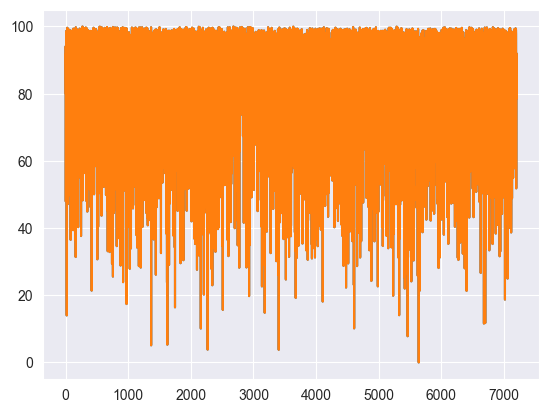

In [23]:
plt.plot(isof_scores)
#sorted isof scores
sorted_isof = np.sort(isof_scores)
print(" min:   ",min(isof_scores))
print(" max:   ",max(isof_scores))
plt.plot(sorted_isof)

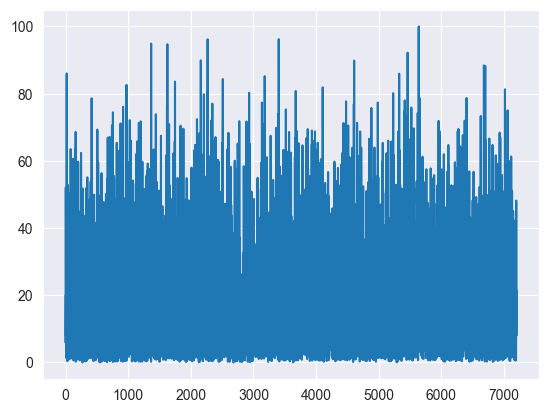

In [34]:
#Saling the scores from 0 to 100
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 100))
isof_scores = isof_scores.reshape(-1,1)
isof_scores = scaler.fit_transform(isof_scores)
isof_scores = 100 - isof_scores
plt.plot(isof_scores)
#append to the dataset as a new column
df['isof_scores'] = isof_scores



In [43]:
df.head()
#save the new dataset
df.to_csv('new_dataset.csv', index=True)
print(sum(isof_scores > 54.45))

[288]
